In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import sys

import layers as layers
import util as util
import networks as networks

torch.set_default_dtype(torch.float64)

In [2]:
sys.path.insert(0, '../exp/')
import util as util_data

In [3]:
importlib.reload(layers)
importlib.reload(util)
importlib.reload(networks)

<module 'networks' from '/Users/beaucoker/Documents/git/VS-BNN/code/horseshoe/networks.py'>

In [4]:
n_obs = 100
dim_in = 2
Z, X, Y, sig2 = util_data.load_data('rbf', n_obs=n_obs, dim_in=dim_in, sig2=.01, seed=0)


In [66]:
n_obs = 100
dim_in = 2
Z = np.random.uniform(size=(n_obs, dim_in))
Y = 5*Z[:,0]+5*Z[:,1]
#+np.random.normal(0,np.sqrt(.0001),size=n_obs)

In [5]:
# 2d
n_obs = 100
dim_in = 2
sig2=.01
#Z = np.zeros((n_obs, dim_in))
#Z[:,0] = np.linspace(-5,5,n_obs)
#Z[:,1] = np.linspace(-5,5,n_obs)
Z = np.random.uniform(-5,5,size=(n_obs, dim_in))

f_true = lambda X: X[:,0]+X[:,1]
Y = f_true(Z)+np.random.normal(0,np.sqrt(sig2),size=n_obs)
Y = Y.reshape(-1,1)

In [119]:
# 1d
n_obs = 25
dim_in = 1
sig2=.01
Z = np.linspace(-5,5,n_obs).reshape(-1,1)
Y = Z[:,0]+np.random.normal(0,np.sqrt(sig2),size=n_obs)
Y = Y.reshape(-1,1)

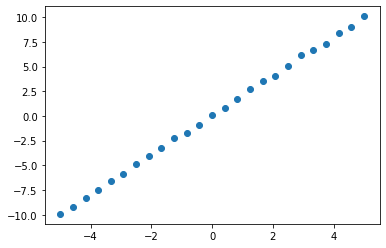

In [229]:
plt.scatter(Z[:,0],Y)

In [6]:
torch.manual_seed(2)
model = networks.RffHs(dim_in, 1, dim_hidden=50, sig2_inv=1/sig2)

In [7]:
torch.manual_seed(2)
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
model.reinit_parameters(torch.from_numpy(Z),torch.from_numpy(Y),n_reinit=10) 

In [8]:
for name, p in model.named_parameters():
    print(name, p.detach())

layer_in.lognu_mu tensor([-0.0067])
layer_in.lognu_logsig2 tensor([-8.9781])
layer_in.logeta_mu tensor([ 0.0168, -0.0134])
layer_in.logeta_logsig2 tensor([-8.9990, -8.9849])


In [339]:
# only one fixed_point_update
model = networks.RffHs(dim_in, 1, dim_hidden=50, sig2_inv=1/sig2)
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
networks.train(model, optimizer, torch.from_numpy(Z), torch.from_numpy(Y), n_epochs=1, n_rep_opt=1, print_freq=1)


Epoch[1/1], kl: 14.754923, likelihood: -65.497374, elbo: -92.275649


tensor([115493.4712])

Epoch[1/500], kl: 14.727868, likelihood: -8.132254, elbo: 7.757685
Epoch[2/500], kl: 14.732865, likelihood: 7.855213, elbo: -0.567639
Epoch[3/500], kl: 14.739153, likelihood: 16.137141, elbo: -34.669662
Epoch[4/500], kl: 14.747187, likelihood: -8.851765, elbo: -13.905918
Epoch[5/500], kl: 14.757329, likelihood: 14.129060, elbo: -69.593437
Epoch[6/500], kl: 14.764566, likelihood: 23.400410, elbo: 20.973840
Epoch[7/500], kl: 14.773902, likelihood: 23.263046, elbo: 16.534890
Epoch[8/500], kl: 14.783323, likelihood: -31.040848, elbo: 6.921917
Epoch[9/500], kl: 14.792776, likelihood: 38.390280, elbo: 13.158964
Epoch[10/500], kl: 14.801178, likelihood: 23.873542, elbo: -13.410572
Epoch[11/500], kl: 14.812394, likelihood: 31.594941, elbo: 14.855886
Epoch[12/500], kl: 14.824500, likelihood: 18.455228, elbo: 8.127239
Epoch[13/500], kl: 14.836368, likelihood: -5.953668, elbo: 3.011137
Epoch[14/500], kl: 14.846320, likelihood: 4.461057, elbo: 9.321475
Epoch[15/500], kl: 14.856544, likelihood: 34.

Epoch[121/500], kl: 16.074105, likelihood: 50.710659, elbo: 13.569895
Epoch[122/500], kl: 16.085568, likelihood: 53.970321, elbo: 23.799453
Epoch[123/500], kl: 16.095008, likelihood: 56.566864, elbo: 52.103467
Epoch[124/500], kl: 16.104504, likelihood: 51.345655, elbo: 22.633244
Epoch[125/500], kl: 16.114819, likelihood: 57.233043, elbo: 8.009658
Epoch[126/500], kl: 16.123594, likelihood: -1.496793, elbo: 29.572182
Epoch[127/500], kl: 16.132846, likelihood: 30.098377, elbo: 31.742826
Epoch[128/500], kl: 16.144152, likelihood: 71.070417, elbo: 46.072595
Epoch[129/500], kl: 16.151483, likelihood: 43.117823, elbo: 16.908064
Epoch[130/500], kl: 16.159873, likelihood: 35.039312, elbo: 6.320327
Epoch[131/500], kl: 16.169890, likelihood: 75.037079, elbo: 62.660048
Epoch[132/500], kl: 16.182400, likelihood: 69.003504, elbo: 31.160322
Epoch[133/500], kl: 16.198769, likelihood: 58.682572, elbo: 27.329692
Epoch[134/500], kl: 16.214786, likelihood: 48.964772, elbo: 18.512415
Epoch[135/500], kl: 16

Epoch[239/500], kl: 17.141893, likelihood: 66.528328, elbo: 51.224713
Epoch[240/500], kl: 17.147928, likelihood: 74.408632, elbo: 55.943970
Epoch[241/500], kl: 17.154960, likelihood: 76.945771, elbo: 63.462188
Epoch[242/500], kl: 17.163207, likelihood: 85.111378, elbo: 66.602707
Epoch[243/500], kl: 17.169414, likelihood: 73.312459, elbo: 56.326133
Epoch[244/500], kl: 17.171236, likelihood: 78.349396, elbo: 62.983967
Epoch[245/500], kl: 17.176189, likelihood: 51.002261, elbo: 56.735248
Epoch[246/500], kl: 17.182366, likelihood: 77.256219, elbo: 58.906203
Epoch[247/500], kl: 17.188860, likelihood: 77.124560, elbo: 58.110743
Epoch[248/500], kl: 17.197053, likelihood: 79.170072, elbo: 61.390153
Epoch[249/500], kl: 17.209442, likelihood: 74.156061, elbo: 57.779340
Epoch[250/500], kl: 17.213887, likelihood: 72.963559, elbo: 53.822105
Epoch[251/500], kl: 17.217476, likelihood: 60.984573, elbo: 26.581518
Epoch[252/500], kl: 17.222882, likelihood: 81.888346, elbo: 66.107473
Epoch[253/500], kl: 

Epoch[360/500], kl: 17.778017, likelihood: 72.302675, elbo: 56.842216
Epoch[361/500], kl: 17.776917, likelihood: 90.126369, elbo: 65.885177
Epoch[362/500], kl: 17.779172, likelihood: 77.692966, elbo: 50.921373
Epoch[363/500], kl: 17.786924, likelihood: 66.394780, elbo: 39.150062
Epoch[364/500], kl: 17.792797, likelihood: 78.825980, elbo: 56.527575
Epoch[365/500], kl: 17.795577, likelihood: 76.500887, elbo: 64.709537
Epoch[366/500], kl: 17.799710, likelihood: 79.088694, elbo: 50.694484
Epoch[367/500], kl: 17.802709, likelihood: 75.005042, elbo: 53.514223
Epoch[368/500], kl: 17.802259, likelihood: 87.148393, elbo: 68.971766
Epoch[369/500], kl: 17.805992, likelihood: 71.006804, elbo: 53.310322
Epoch[370/500], kl: 17.815576, likelihood: 67.682172, elbo: 62.797509
Epoch[371/500], kl: 17.819420, likelihood: 77.533342, elbo: 58.265445
Epoch[372/500], kl: 17.825791, likelihood: 59.461492, elbo: 57.662956
Epoch[373/500], kl: 17.830482, likelihood: 78.002291, elbo: 61.804407
Epoch[374/500], kl: 

Epoch[480/500], kl: 18.149733, likelihood: 82.850837, elbo: 63.812699
Epoch[481/500], kl: 18.149116, likelihood: 80.124723, elbo: 59.631724
Epoch[482/500], kl: 18.152604, likelihood: 70.203901, elbo: 40.106604
Epoch[483/500], kl: 18.153681, likelihood: 82.156549, elbo: 64.987804
Epoch[484/500], kl: 18.149772, likelihood: 81.509435, elbo: 65.201575
Epoch[485/500], kl: 18.150173, likelihood: 86.914727, elbo: 58.357443
Epoch[486/500], kl: 18.153341, likelihood: 78.940090, elbo: 63.888900
Epoch[487/500], kl: 18.151236, likelihood: 59.803388, elbo: 52.172108
Epoch[488/500], kl: 18.147802, likelihood: 78.808938, elbo: 60.981934
Epoch[489/500], kl: 18.148120, likelihood: 83.465198, elbo: 65.189130
Epoch[490/500], kl: 18.150693, likelihood: 69.583753, elbo: 48.445552
Epoch[491/500], kl: 18.151244, likelihood: 74.794250, elbo: 56.662053
Epoch[492/500], kl: 18.152956, likelihood: 84.508103, elbo: 66.090251
Epoch[493/500], kl: 18.154788, likelihood: 75.741742, elbo: 57.106402
Epoch[494/500], kl: 

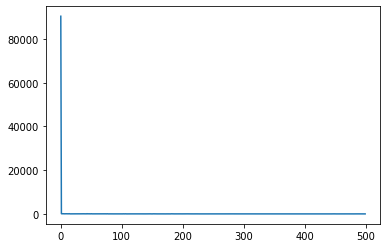

In [9]:
elbo = -networks.train(model, optimizer, torch.from_numpy(Z), torch.from_numpy(Y), n_epochs=500, n_rep_opt=25, print_freq=1)
plt.plot(-elbo)

In [10]:
def plot_slice(model, x, y, dim=0, x_plot=None, x_plot_slice=0.0, n_samp=500, ax=None, f_true=None):
    with torch.no_grad():
    
        if ax is None:
            fig, ax = plt.subplots()
        dim_in = model.dim_in

        if x_plot is None:
            x_plot = torch.linspace(x.min(),x.max(),100)
            
        if type(x) is not np.ndarray:
            x = x.numpy()
            
        if type(y) is not np.ndarray:
            y = y.numpy()

        xx = x_plot_slice*torch.ones(x_plot.shape[0], dim_in)
        xx[:,dim] = x_plot.reshape(-1)

        f_pred_plot = model(xx, sample_input_layer=False, weights_type='mean').numpy() # posterior mean

        ax.scatter(x[:,dim], y) # training data
        ax.plot(xx[:,dim], f_pred_plot) # posterior mean
        
        # true function
        if f_true is not None:
            y_true = f_true(xx)
            ax.plot(xx[:,dim], y_true)

        # uncertainty
        f_samp_plot = np.zeros((n_samp, x_plot.shape[0]))
        for i in range(n_samp):
            f_samp_plot[i,:] = model(xx, sample_input_layer=True, weights_type='sample').numpy().reshape(-1)
        for q in [.025, .05, .1]:
            ci = np.quantile(f_samp_plot, [q, 1-q], axis=0)
            ax.fill_between(xx[:,dim].reshape(-1), ci[0,:], ci[1,:], alpha=.1, color='blue')

            
def plot_slices(model, x, y, x_plot=None, x_plot_slice=0.0, n_samp=500, figsize=(4,4)):
    fig, ax = plt.subplots(1,model.dim_in, figsize=figsize, sharey=True)
    ax[0].set_ylabel('y')
    fig.suptitle("Posterior predictive (1d slices)")
    for dim in range(model.dim_in):
        plot_slice(model, x, y, dim, x_plot, x_plot_slice, n_samp, ax=ax[dim])
        ax[dim].set_xlabel('x'+str(dim))
    return fig, ax


In [11]:
# only one fixed_point_update
model = networks.RffHs(dim_in, 1, dim_hidden=50, sig2_inv=1/sig2)
#optimizer = torch.optim.Adam(model.parameters(), lr=.001)
#networks.train(model, optimizer, torch.from_numpy(Z), torch.from_numpy(Y), n_epochs=1, n_rep_opt=1, print_freq=1)

h = model.layer_in(torch.from_numpy(Z), sample=True)
model.layer_out.fixed_point_updates(h, torch.from_numpy(Y))

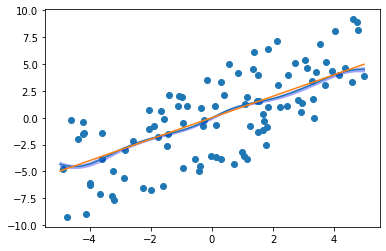

In [12]:
plot_slice(model, Z, Y, dim=0, f_true=f_true)

In [311]:
#h = model.layer_in(torch.from_numpy(Z), sample=True)
from math import sqrt, pi

w=torch.empty(model.dim_hidden, model.dim_in)
b=torch.empty(model.dim_hidden)
y = torch.from_numpy(Y)

w.normal_(0,1)
b.uniform_(0, 2*pi)

#h = sqrt(2/model.dim_out)*torch.cos(F.linear(torch.from_numpy(Z), w, b))
h = F.relu(F.linear(torch.from_numpy(Z), w, b)) # relu features for testing
beta_hat = torch.pinverse(h.T @ h + .001*np.eye(h.shape[1]))@h.T@Y

x_plot = torch.linspace(Z.min(),Z.max(),100)
dim = 0
xx = 0.0*torch.ones(x_plot.shape[0], dim_in)
xx[:,dim] = x_plot.reshape(-1)
inp = xx
#inp = torch.from_numpy(Z)

#h = model.layer_in(inp, sample=True)
#h = sqrt(2/model.dim_out)*torch.cos(F.linear(inp, w, b))
h = F.relu(F.linear(inp, w, b)) # relu features for testing

y = f_true(inp)
yhat = h@beta_hat

#model.layer_out.prior_sig2 = .001

#prior_sig2inv_mat = 1/model.layer_out.prior_sig2*torch.eye(model.layer_out.dim_in)
#sig2 = torch.pinverse(prior_sig2inv_mat + h.T@h/model.layer_out.sig2_y)
#mu = (sig2 @ h.T@y/model.layer_out.sig2_y).transpose(0,1)

#yhat = h@mu.T


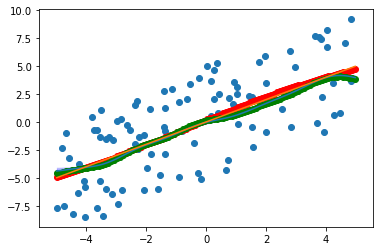

In [312]:
fig, ax = plt.subplots()
plot_slice(model, Z, Y, dim=0, ax=ax, f_true=f_true)
ax.scatter(inp[:,0], yhat.numpy().reshape(-1),color='red')

yhat_model = model(inp,sample_input_layer=True, weights_type='sample').detach()
ax.scatter(inp[:,0], yhat_model.numpy().reshape(-1),color='green')
           

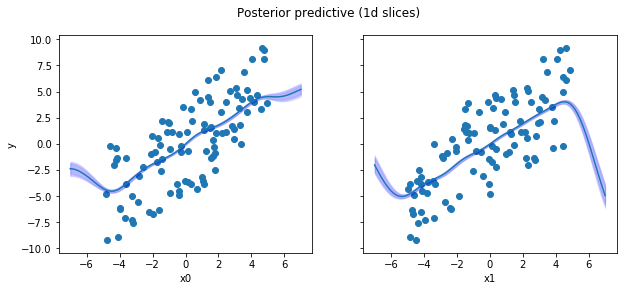

In [13]:
fig, ax = plot_slices(model, Z, Y, x_plot=torch.linspace(-7,7,100).reshape(-1,1), figsize=(10,4))


In [14]:
for name, p in model.named_parameters():
    print(name, p.detach())

layer_in.lognu_mu tensor([-0.0012])
layer_in.lognu_logsig2 tensor([-8.9926])
layer_in.logeta_mu tensor([0.0102, 0.0151])
layer_in.logeta_logsig2 tensor([-9.0034, -8.9986])


In [15]:
with torch.no_grad():
    mu = model.layer_in.logeta_mu
    sig2 = model.layer_in.logeta_logsig2.exp()

    mean = torch.exp(mu + sig2/2)
    var = (torch.exp(sig2)-1)*torch.exp(2*mu+sig2)

In [16]:
mean

tensor([1.0103, 1.0153])

In [17]:
var

tensor([0.0001, 0.0001])

Text(0, 0.5, 'horseshoe parameter (for variable selection)')

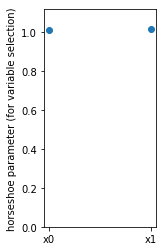

In [18]:
fig, ax = plt.subplots(figsize=(2,4))
ax.errorbar(np.arange(model.dim_in), mean.detach(), yerr=var.detach(), fmt='o')
ax.set_ylim(0,1.1*mean.max())
ax.set_xticks(np.arange(model.dim_in))
ax.set_xticklabels(['x'+str(z) for z in range(dim_in)])
ax.set_ylabel('horseshoe parameter (for variable selection)')

#### GPy for comparison

In [29]:
import GPy
kernel = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=1.)

In [30]:
m = GPy.models.GPRegression(Z,Y,kernel)

m.Gaussian_noise.variance = sig2
m.Gaussian_noise.fix()
m.optimize_restarts(num_restarts = 10, verbose=False)

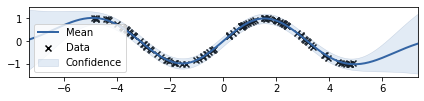

In [41]:
slices = [0]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=True)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

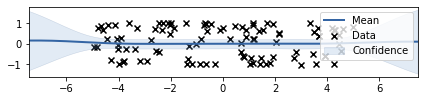

In [42]:
slices = [0]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=True)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')

In [ ]:
### SIN dataset

In [19]:
m = torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2))

In [31]:
m.sample((10,)).shape

torch.Size([10, 2])

In [35]:
dist_nu = torch.distributions.log_normal.LogNormal(loc=model.layer_in.lognu_mu, 
                                                               scale=model.layer_in.lognu_logsig2.exp().sqrt())

dist_eta = torch.distributions.log_normal.LogNormal(loc=model.layer_in.logeta_mu, 
                                                    scale=model.layer_in.logeta_logsig2.exp().sqrt())

dist_beta = torch.distributions.multivariate_normal.MultivariateNormal(loc=model.layer_out.mu, 
                                                                       covariance_matrix=model.layer_out.sig2)


In [36]:
n_samp = 3
samp_nu = dist_nu.sample((n_samp,))
samp_eta = dist_eta.sample((n_samp,))
samp_beta = dist_beta.sample((n_samp,))

In [42]:
X = torch.from_numpy(Z)

In [50]:
model.layer_in.w.T

torch.Size([2, 50])

In [47]:
samp_eta.shape

torch.Size([3, 2])

In [62]:
torch.unsqueeze(model.layer_in.w.T,0).shape

torch.Size([1, 2, 50])

In [60]:
torch.unsqueeze(samp_eta, 2).shape

torch.Size([3, 2, 1])

In [64]:
temp = torch.unsqueeze(samp_eta, 2) * torch.unsqueeze(model.layer_in.w.T,0)
temp.shape

torch.Size([3, 2, 50])

In [71]:
model.layer_in.w.shape

torch.Size([50, 2])

In [68]:
X.shape

torch.Size([100, 2])

In [73]:
torch.addbmm?

In [85]:
samp_nu = dist_nu.sample()
samp_eta = dist_eta.sample()
samp_beta = dist_beta.sample()

nu_eta_w = samp_nu*samp_eta*model.layer_in.w

temp=torch.sin(F.linear(X, nu_eta_w, model.layer_in.b)).shape

In [90]:
torch.diag(nu_eta_w[:,1])

torch.Size([50, 50])

In [79]:
torch.sin(F.linear(X, samp_nu*samp_eta*model.layer_in.w, model.layer_in.b))

torch.Size([100, 50])

In [80]:
model.layer_in.w.shape

torch.Size([50, 2])

In [ ]:
-sqrt(2/self.dim_out)\
 *torch.sin(F.linear(torch.from_numpy(X), nu_eta_w, self.layer_in.b))
 *torch.diag(nu_eta_w[:,1])
 @samp_beta

In [108]:
temp = torch.sin(F.linear(X, nu_eta_w, model.layer_in.b)) \
 @ torch.diag(nu_eta_w[:,1]) \
 @ samp_beta.T

In [109]:
temp.shape

torch.Size([100, 1])

In [110]:
X.shape

torch.Size([100, 2])

In [112]:
X.requires_grad=True

In [114]:
?torch.from_numpy?

In [ ]:
?torch.from_numpy

In [126]:
x = torch.randn((10,2),requires_grad=True)
w = torch.randn((1,2))

In [127]:
w

tensor([[ 0.0086, -0.2584]])

In [128]:
y = x @ w.T

In [129]:
y.sum().backward()

In [130]:
x.grad

tensor([[ 0.0086, -0.2584],
        [ 0.0086, -0.2584],
        [ 0.0086, -0.2584],
        [ 0.0086, -0.2584],
        [ 0.0086, -0.2584],
        [ 0.0086, -0.2584],
        [ 0.0086, -0.2584],
        [ 0.0086, -0.2584],
        [ 0.0086, -0.2584],
        [ 0.0086, -0.2584]])

In [131]:
y.shape

torch.Size([10, 1])

In [133]:
hasattr(model, 'forward2')

False